In [46]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [47]:
dNde = lambda en, norm, gamma, line, line_energy, sigma: \
    norm * en**(-gamma) + line / np.sqrt(2*np.pi) / sigma * np.exp(-1 / 2 * (en-line_energy)**2 / sigma**2)

pl = lambda en, norm, gamma: norm * en**(-gamma)

In [48]:
model_norm = 1000
model_gamma = 2.1
model_line = 100
model_line_energy = 5
model_sigma = 0.5

model = lambda x_: dNde(x_, model_norm, model_gamma, model_line, model_line_energy, model_sigma)

x = np.linspace(0.1, 10)

y = model(x)

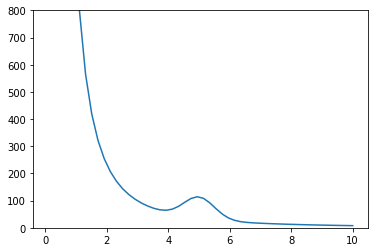

In [49]:
plt.plot(x, y)
plt.ylim(0, 800)
plt.show()

In [50]:
num_bin = 40
x_lower = 0.5
x_upper = 10
delta = (x_upper-x_lower) / num_bin
sim_spectrum = []
plot_spectrum = []

for i in range(1, num_bin+1):
    
    x = x_lower + delta * (i - 0.5)
    x_a = x_lower + delta * (i - 1)
    x_b = x_lower + delta * i
    value = quad(model, x_a, x_b)
    sd = np.sqrt(value)
    
    # error_gaussian = np.random.normal(0, sd)
    # sim_value = value + error_gaussian
    
    sim_value = np.random.poisson(value)[0]
    sim_error = np.sqrt(sim_value)
    
    sim_spectrum.append([x, sim_value, sim_error])
    
sim_spectrum = np.array(sim_spectrum)

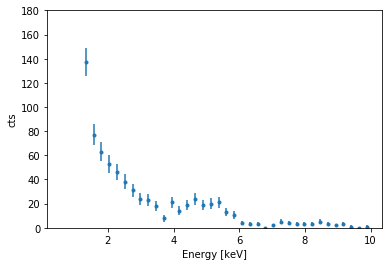

In [54]:
# print(sim_spectrum[:, 0])
plt.errorbar(sim_spectrum[:, 0], sim_spectrum[:, 1], yerr=sim_spectrum[:, 2], fmt='.')
# plt.xscale('log')
# plt.yscale('log')
plt.ylim(0, 180)
plt.xlabel('Energy [keV]')
plt.ylabel('cts')
plt.show()

